In [79]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/cars-dataset/clean_fused_dataset.csv


In [80]:
df = pd.read_csv("/kaggle/input/cars-dataset/clean_fused_dataset.csv")

In [81]:
df = df.drop(columns=["Unnamed: 0"])
df = df.drop(columns=["isautoscout"])

In [82]:
df.columns

Index(['mark', 'model', 'description', 'fuel', 'km', 'year', 'gearbox',
       'price', 'power', 'isofix', 'led', 'cruise_control', 'bluetooth',
       'auto_clim', 'rear_cam', 'rear_rad'],
      dtype='object')

In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34221 entries, 0 to 34220
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   mark            34221 non-null  object 
 1   model           34221 non-null  object 
 2   description     34221 non-null  object 
 3   fuel            34221 non-null  object 
 4   km              34221 non-null  float64
 5   year            34221 non-null  int64  
 6   gearbox         34221 non-null  object 
 7   price           34221 non-null  float64
 8   power           34221 non-null  float64
 9   isofix          34221 non-null  int64  
 10  led             34221 non-null  int64  
 11  cruise_control  34221 non-null  int64  
 12  bluetooth       34221 non-null  int64  
 13  auto_clim       34221 non-null  int64  
 14  rear_cam        34221 non-null  int64  
 15  rear_rad        34221 non-null  int64  
dtypes: float64(3), int64(8), object(5)
memory usage: 4.2+ MB


# Studiying features

## Description

In [84]:
print("poucentage of classes of description compared to the total number of rows: ",str(len(df["description"].unique())/df.shape[0] * 100)+'%')

poucentage of classes of description compared to the total number of rows:  50.913181964290935%


## We can see that we have a high cardinality in the column description and acording to our knowledge this may lead to overfitting, Increased Complexity and Training Time, so we decide to delete this row

In [85]:
df = df.drop(columns = ["description"])

## Label Encoding

In [86]:
# from sklearn.preprocessing import LabelEncoder
# from sklearn.model_selection import train_test_split
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.metrics import mean_absolute_error


# label_encoder = LabelEncoder()
# categorical_features = df.select_dtypes(exclude=['number']).columns.tolist()
# X = df.copy()
# for col in categorical_features:
#     X[col] = label_encoder.fit_transform(X[col])
# y = X["price"]
# X.head()

In [87]:
# X = X.drop(columns=["price"], axis=1)

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
# rf_regressor.fit(X_train, y_train)
# feature_importances = rf_regressor.feature_importances_
# feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
# feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
# print(feature_importance_df)
# y_pred = rf_regressor.predict(X_test)
# mse = mean_absolute_error(y_test, y_pred)
# print(f"Mean Squared Error: {mse}")

## mark


## We Noticed that we have Mercedes and Mercedes-Benz so we combine them

In [88]:
df.loc[df["mark"] == "MERCEDES-BENZ", "mark"] = "MERCEDES"

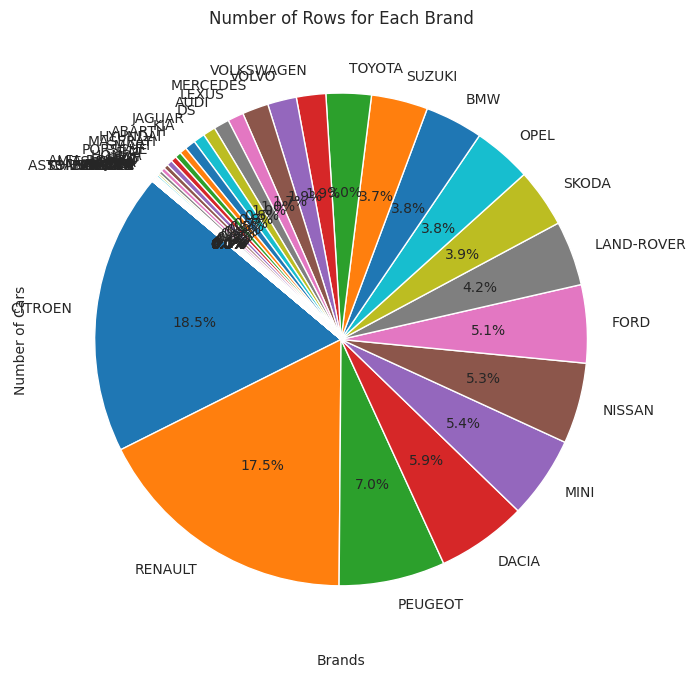

In [89]:
import matplotlib.pyplot as plt
category_counts = df['mark'].value_counts()
plt.figure(figsize=(8, 8))  # Optional: Adjust the figure size
plt.pie(category_counts, labels=df['mark'].unique(), autopct='%1.1f%%', startangle=140)
plt.xlabel('Brands')
plt.ylabel('Number of Cars')
plt.title('Number of Rows for Each Brand')
plt.show()

## We can recognize imbalanced data in this feature

## Getting the brands under 1% of the dataset

In [90]:
category_counts = df['mark'].value_counts()
category_counts[(category_counts / df.shape[0] *100) < 1] / df.shape[0] *100

mark
TESLA           0.818211
MINI            0.751001
MAZDA           0.698402
MITSUBISHI      0.464627
KIA             0.400339
FIAT            0.371117
LAND-ROVER      0.368195
FERRARI         0.295140
LEXUS           0.260074
SEAT            0.213319
JAGUAR          0.125654
MG              0.119809
MASERATI        0.084743
JEEP            0.064288
ALFA ROMEO      0.058444
SMART           0.055521
HONDA           0.035066
ABARTH          0.029222
ALPINE          0.026300
CUPRA           0.023377
INFINITI        0.008767
ASTON MARTIN    0.005844
CHEVROLET       0.005844
IVECO           0.002922
BENTLEY         0.002922
SSANGYONG       0.002922
AIWAYS          0.002922
SUBARU          0.002922
Name: count, dtype: float64

In [91]:
minority_brands = category_counts[(category_counts / df.shape[0] *100) < 1].index.tolist()

## Combining Rare brands: Group together the rare classes into a single "OTHERS" category. This reduces the number of unique values and helps the model focus on the more frequent classes.

In [92]:
for b in minority_brands:
    df.loc[df["mark"] == b, "mark"] = "OTHERS"

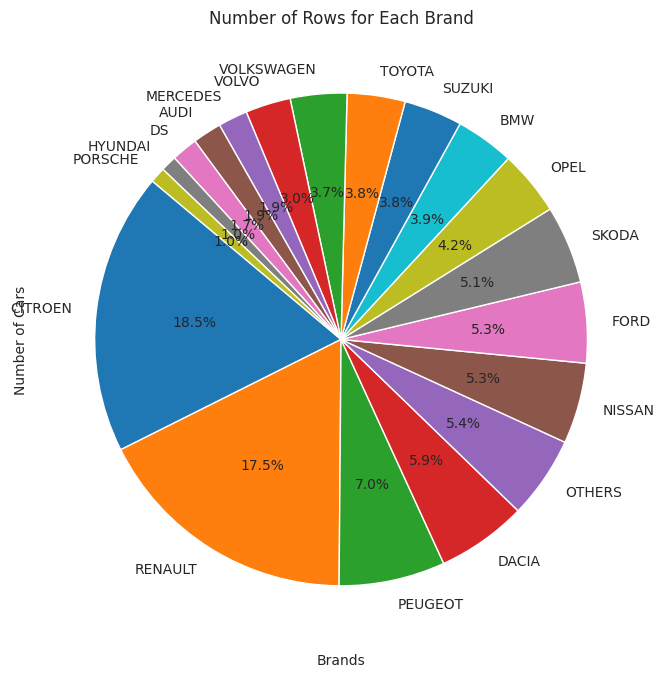

In [93]:
import matplotlib.pyplot as plt
category_counts = df['mark'].value_counts()
plt.figure(figsize=(8, 8))  # Optional: Adjust the figure size
plt.pie(category_counts, labels=df['mark'].unique(), autopct='%1.1f%%', startangle=140)
plt.xlabel('Brands')
plt.ylabel('Number of Cars')
plt.title('Number of Rows for Each Brand')
plt.show()

## Now we try to undersample randomly the two brands "RENAULT", "CITROEN" and "PEUGEOT"

In [94]:
renault_indexes = df[df["mark"] == "RENAULT"].index
random_indices_renault = pd.Series(renault_indexes).sample(frac=0.5, random_state=42)
df.drop(random_indices_renault, inplace=True)

In [95]:
renault_indexes = df[df["mark"] == "CITROEN"].index
random_indices_renault = pd.Series(renault_indexes).sample(frac=0.5, random_state=42)
df.drop(random_indices_renault, inplace=True)

In [96]:
renault_indexes = df[df["mark"] == "PEUGEOT"].index
random_indices_renault = pd.Series(renault_indexes).sample(frac=0.5, random_state=42)
df.drop(random_indices_renault, inplace=True)

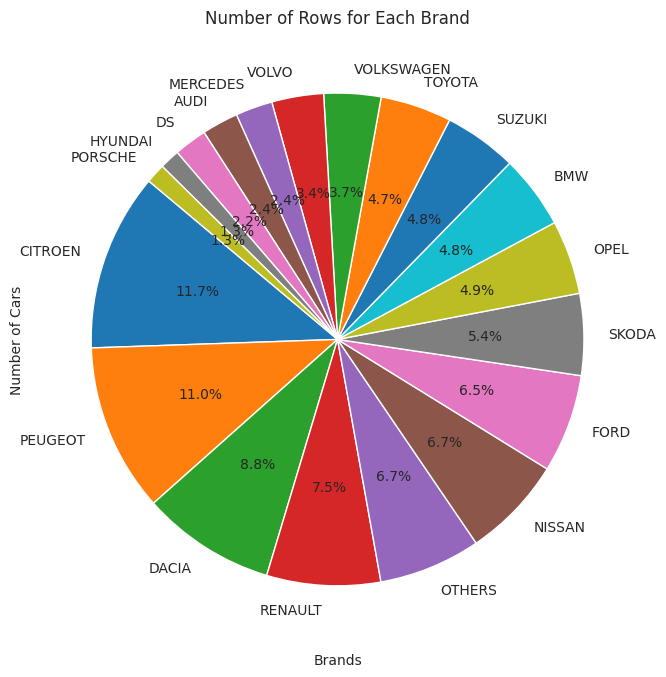

In [97]:
import matplotlib.pyplot as plt
category_counts = df['mark'].value_counts()
plt.figure(figsize=(8, 8))  # Optional: Adjust the figure size
plt.pie(category_counts, labels=df['mark'].unique(), autopct='%1.1f%%', startangle=140)
plt.xlabel('Brands')
plt.ylabel('Number of Cars')
plt.title('Number of Rows for Each Brand')
plt.show()

## We use oversampling for the brands under 5%

In [98]:
minority_brands_under_3 = category_counts[(category_counts / df.shape[0] *100) < 3].index.tolist()
minority_brands_under_5 = category_counts[((category_counts / df.shape[0] *100) >= 3) & ((category_counts / df.shape[0] *100) < 5)].index.tolist()

In [99]:
for b in minority_brands_under_3:
    brand_df = df[df["mark"] == b]
    df = pd.concat([df, brand_df], axis=0, ignore_index=True)

In [100]:
for b in minority_brands_under_5:
    brand_df = df[df["mark"] == b]
    brand_df = pd.concat([brand_df,brand_df] , axis=0, ignore_index=True)
    df = pd.concat([df, brand_df], axis=0, ignore_index=True)

## We see that the brands are far more balanced now

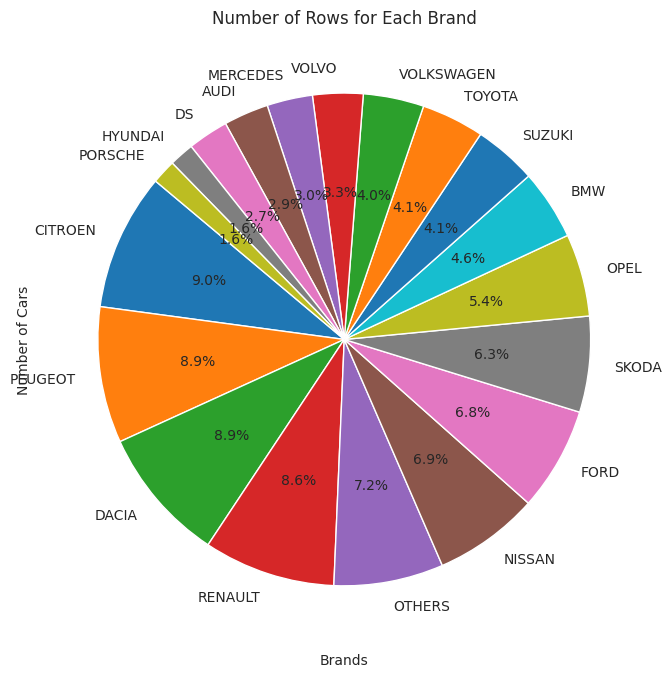

In [101]:
import matplotlib.pyplot as plt
category_counts = df['mark'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(category_counts, labels=df['mark'].unique(), autopct='%1.1f%%', startangle=140)
plt.xlabel('Brands')
plt.ylabel('Number of Cars')
plt.title('Number of Rows for Each Brand')
plt.show()

## model: 

### This is the number of models for each brand

In [102]:
model_counts_by_brand = df.groupby('mark')['model'].nunique()
print(model_counts_by_brand)

mark
AUDI           36
BMW           114
CITROEN        40
DACIA           8
DS              9
FORD           43
HYUNDAI        30
MERCEDES      162
NISSAN         21
OPEL           29
OTHERS        144
PEUGEOT        35
PORSCHE        18
RENAULT        41
SKODA          17
SUZUKI         15
TOYOTA         23
VOLKSWAGEN     59
VOLVO          25
Name: model, dtype: int64


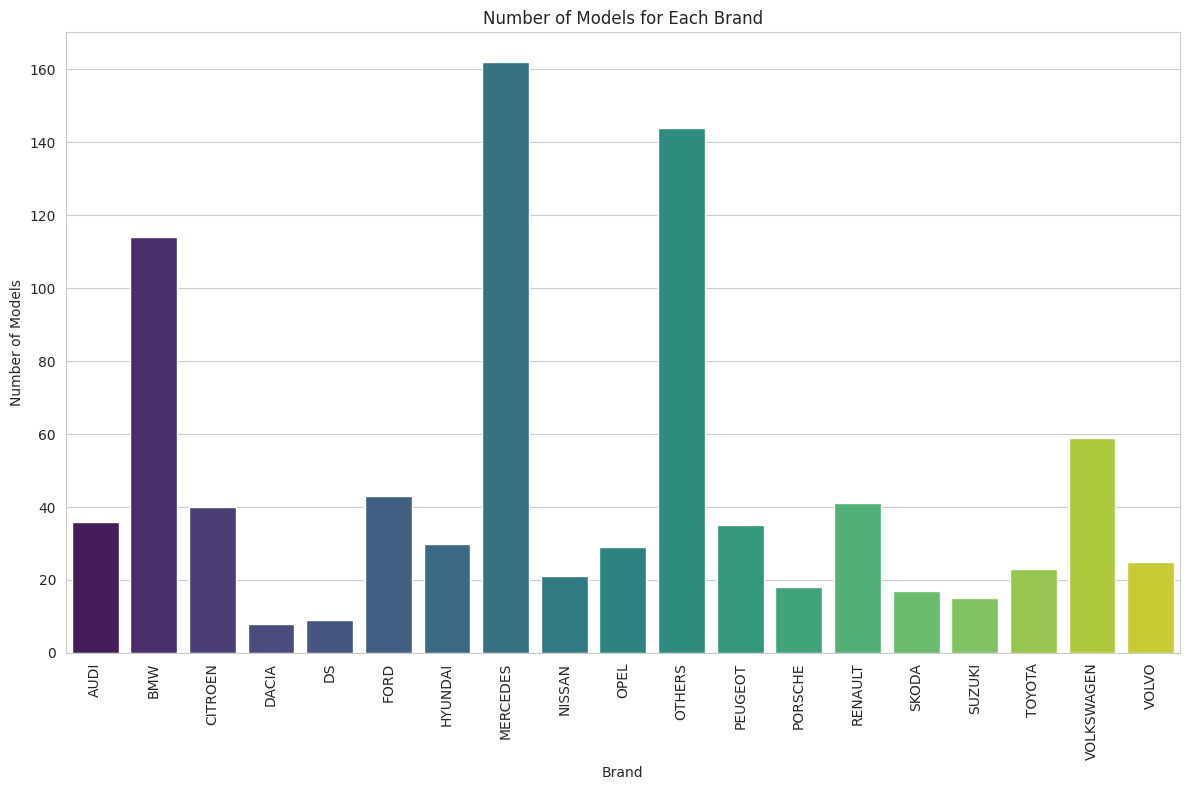

In [103]:
import seaborn as sns
import matplotlib.pyplot as plt
model_counts_by_brand = df.groupby('mark')['model'].nunique().reset_index()
sns.set_style("whitegrid")
plt.figure(figsize=(12, 8))
sns.barplot(data=model_counts_by_brand, x='mark', y='model', palette='viridis')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.xlabel('Brand')
plt.ylabel('Number of Models')
plt.title('Number of Models for Each Brand')
plt.tight_layout()
plt.show()


## We are interested in "DACIA" as we can see, it has the second most numbers of samples but the least numbers of unique model values, this indicates that there are a lot of repititions in each of these models, let's find out


In [104]:
df[df["mark"] == "DACIA"]["model"].value_counts() / len(df[df["mark"] == "DACIA"]) * 100


model
Sandero      40.189125
Duster       38.140268
Spring        7.880221
Lodgy         6.304177
Logan         3.230890
Jogger        1.812451
Dokker        1.497242
Logan Mcv     0.945626
Name: count, dtype: float64

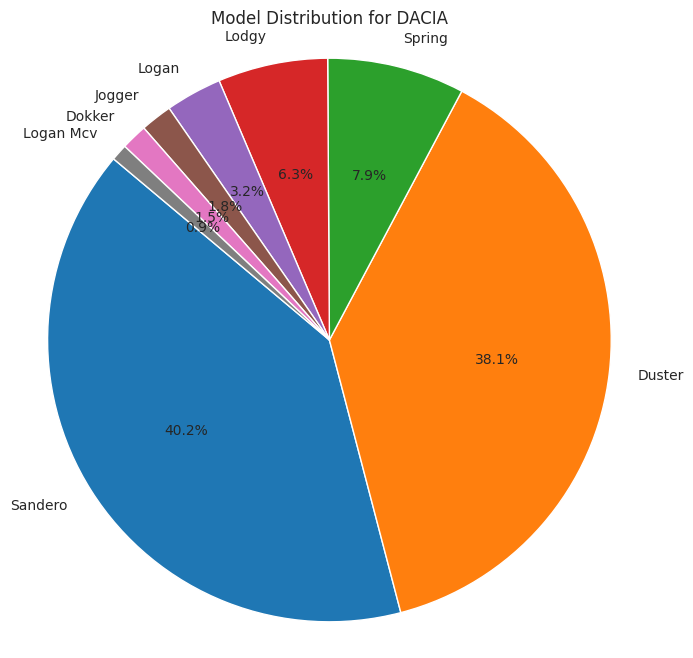

In [105]:
dacia_model_distribution = df[df["mark"] == "DACIA"]["model"].value_counts() / len(df[df["mark"] == "DACIA"]) * 100
plt.figure(figsize=(8, 8))
plt.pie(dacia_model_distribution, labels=dacia_model_distribution.index, autopct='%1.1f%%', startangle=140)
plt.title('Model Distribution for DACIA')
plt.axis('equal')
plt.show()

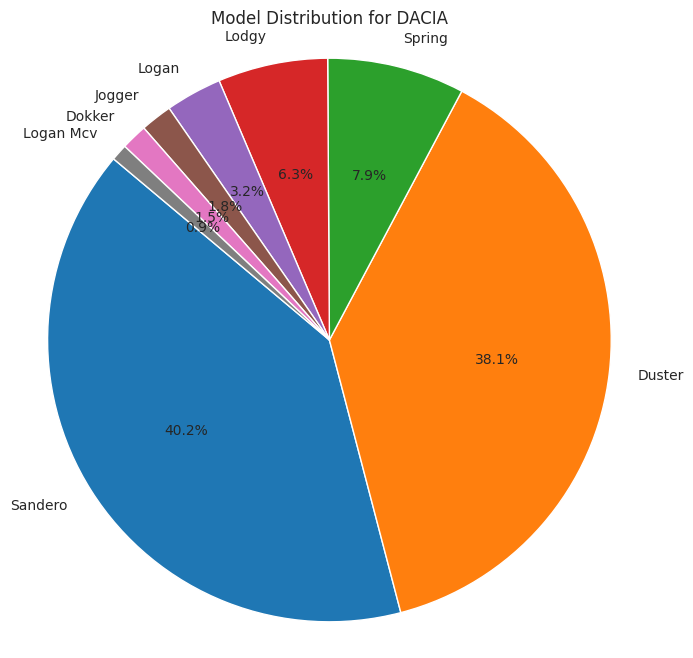

In [106]:
dacia_model_distribution = df[df["mark"] == "DACIA"]["model"].value_counts() / len(df[df["mark"] == "DACIA"]) * 100
plt.figure(figsize=(8, 8))
plt.pie(dacia_model_distribution, labels=dacia_model_distribution.index, autopct='%1.1f%%', startangle=140)
plt.title('Model Distribution for DACIA')
plt.axis('equal')
plt.show()

## We see that the model "Sandero" and "Duster" are overrepresented 
## We can use undersampling technique

In [107]:
sandero_indices = df[df["model"] == "Sandero"].index.tolist()
random_sandero_indices = pd.Series(sandero_indices).sample(frac=0.8, random_state=42)
df.drop(random_sandero_indices, inplace=True)

In [108]:
duster_indices = df[df["model"] == "Duster"].index.tolist()
random_duster_indices = pd.Series(duster_indices).sample(frac=0.8, random_state=42)
df.drop(random_duster_indices, inplace=True)

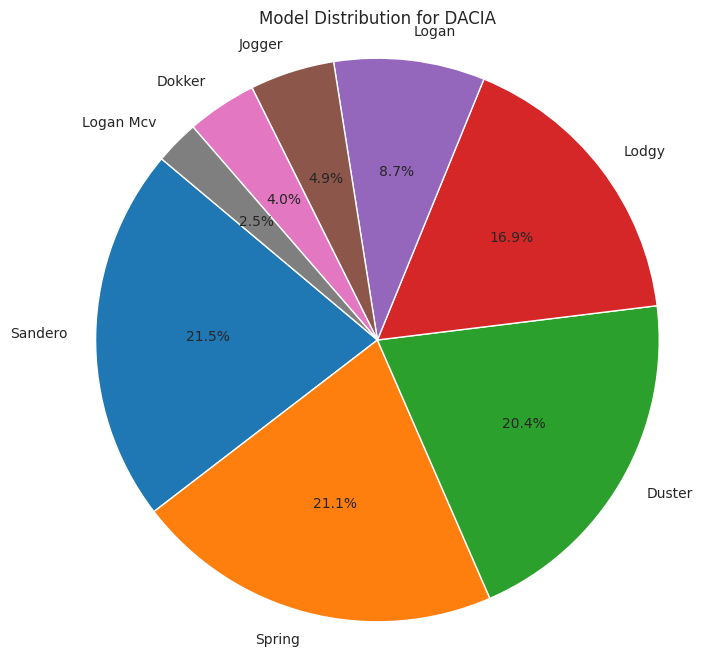

In [109]:
dacia_model_distribution = df[df["mark"] == "DACIA"]["model"].value_counts() / len(df[df["mark"] == "DACIA"]) * 100
plt.figure(figsize=(8, 8))
plt.pie(dacia_model_distribution, labels=dacia_model_distribution.index, autopct='%1.1f%%', startangle=140)
plt.title('Model Distribution for DACIA')
plt.axis('equal')
plt.show()


## We can oversample the models under 10%

In [110]:
models_pourcentages = df[df["mark"] == "DACIA"]["model"].value_counts() / len(df[df["mark"] == "DACIA"]) * 100
under_10_models = models_pourcentages[models_pourcentages < 10].index.tolist()
for model in under_10_models:
    df_added = df[df["model"] == model]
    df = pd.concat([df, df_added], axis=0, ignore_index=True)

## We redo that

In [111]:
models_pourcentages = df[df["mark"] == "DACIA"]["model"].value_counts() / len(df[df["mark"] == "DACIA"]) * 100
under_10_models = models_pourcentages[models_pourcentages < 10].index.tolist()
for model in under_10_models:
    df_added = df[df["model"] == model]
    df = pd.concat([df, df_added], axis=0, ignore_index=True)

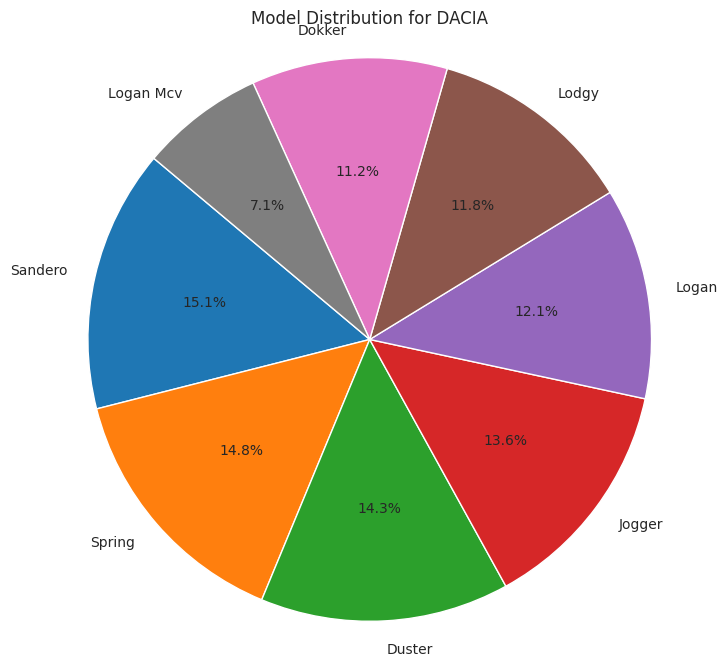

In [112]:
dacia_model_distribution = df[df["mark"] == "DACIA"]["model"].value_counts() / len(df[df["mark"] == "DACIA"]) * 100
plt.figure(figsize=(8, 8))
plt.pie(dacia_model_distribution, labels=dacia_model_distribution.index, autopct='%1.1f%%', startangle=140)
plt.title('Model Distribution for DACIA')
plt.axis('equal')
plt.show()


## The models are pretty balanced

In [113]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
categorical_features = df.select_dtypes(exclude=['number']).columns.tolist()
X = df.copy()
for col in categorical_features:
    X[col] = label_encoder.fit_transform(X[col])

In [114]:
y = X["price"]
X = X.drop(columns=["price"], axis=1)

In [115]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)

rf_regressor.fit(X_train, y_train)

feature_importances = rf_regressor.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
print(feature_importance_df)

           Feature  Importance
6            power    0.372950
3               km    0.250717
1            model    0.124688
4             year    0.091006
0             mark    0.071531
2             fuel    0.031761
5          gearbox    0.013382
7           isofix    0.012350
8              led    0.010178
13        rear_rad    0.006508
12        rear_cam    0.006187
11       auto_clim    0.003654
10       bluetooth    0.002710
9   cruise_control    0.002378


In [116]:
y_pred = rf_regressor.predict(X_test)
mse = mean_absolute_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 4972.370901235709


# Price

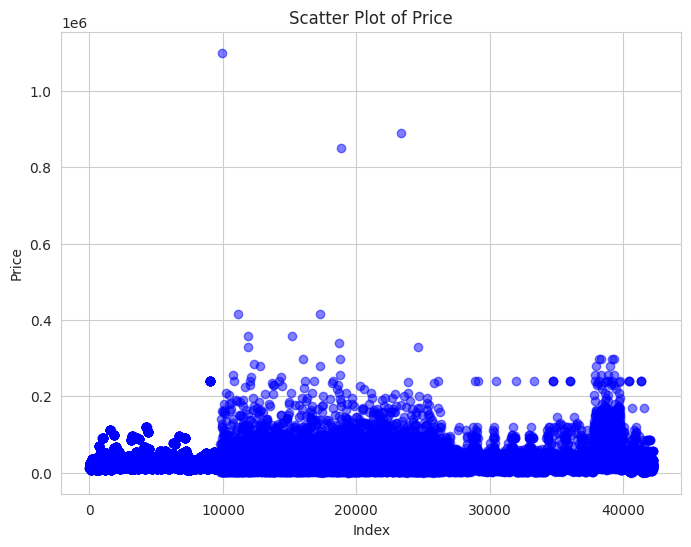

In [117]:
plt.figure(figsize=(8, 6))
plt.scatter(df.index, df['price'], color='blue', alpha=0.5)  # Scatter plot
plt.title('Scatter Plot of Price')
plt.xlabel('Index')
plt.ylabel('Price')
plt.grid(True)
plt.show()

## We can spott some outliers in the price 

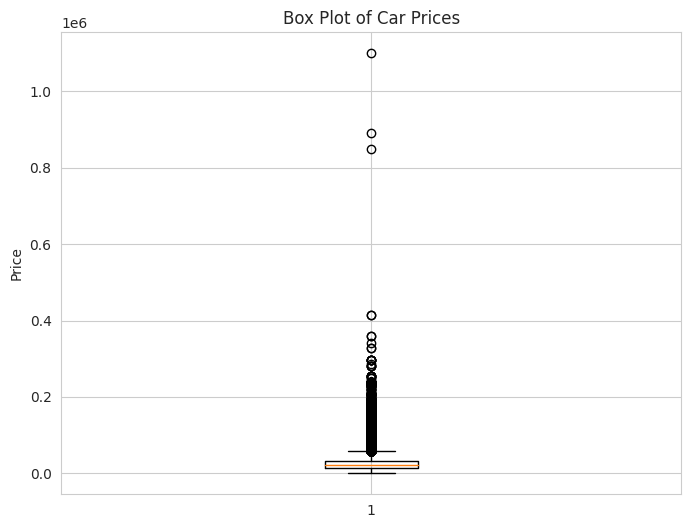

In [118]:
plt.figure(figsize=(8, 6))
plt.boxplot(df['price'])
plt.title('Box Plot of Car Prices')
plt.ylabel('Price')
plt.show()


## The boxplot highlights a very high imbalance in the data

## Trying to filter the dataset from the outliers 

In [119]:
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df_clean = df[(df['price'] >= lower_bound) & (df['price'] <= upper_bound)]

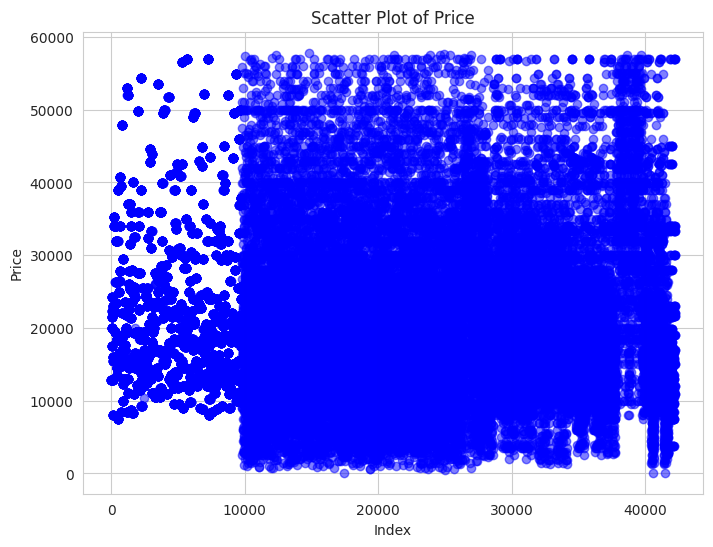

In [120]:
plt.figure(figsize=(8, 6))
plt.scatter(df_clean.index, df_clean['price'], color='blue', alpha=0.5)
plt.title('Scatter Plot of Price')
plt.xlabel('Index')
plt.ylabel('Price')
plt.grid(True)
plt.show()

In [121]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error


label_encoder = LabelEncoder()
categorical_features = df_clean.select_dtypes(exclude=['number']).columns.tolist()
X = df_clean.copy()
for col in categorical_features:
    X[col] = label_encoder.fit_transform(X[col])
y = X["price"]
X = X.drop(columns=["price"], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(X_train, y_train)
feature_importances = rf_regressor.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
print(feature_importance_df)
y_pred = rf_regressor.predict(X_test)
mse = mean_absolute_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

           Feature  Importance
3               km    0.251227
6            power    0.240255
4             year    0.209746
1            model    0.099982
0             mark    0.061749
2             fuel    0.049523
7           isofix    0.023185
5          gearbox    0.014480
8              led    0.012862
12        rear_cam    0.010048
13        rear_rad    0.009095
11       auto_clim    0.006771
10       bluetooth    0.006259
9   cruise_control    0.004818
Mean Squared Error: 3150.5811838780883


## We can see the difference between the case when we have outliers in prices and when we have not

# Now we want to perform some classification

## Using Kmeans, we can Cluster our prices into classes

## First we use the elbow technique to get the best value for K

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:8

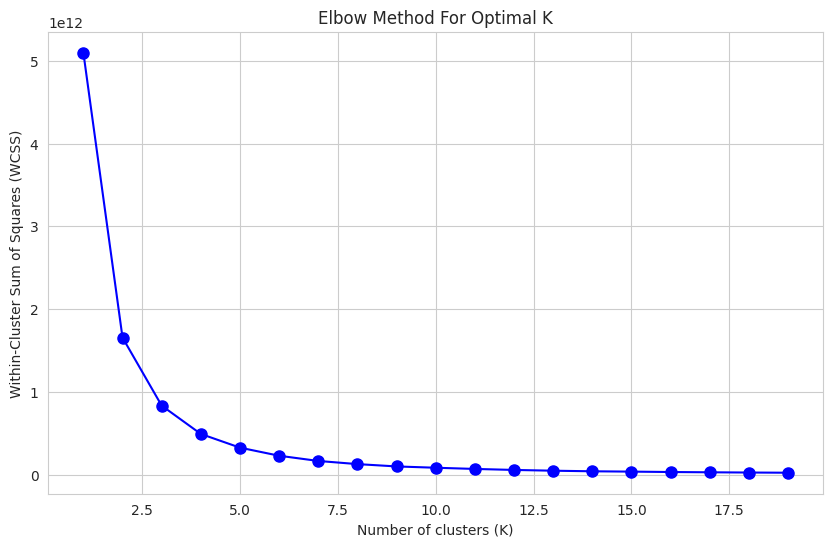

In [122]:
from sklearn.cluster import KMeans

X = df_clean[['price']].values

wcss = []
K_range = range(1, 20)  # You can adjust the range as needed

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)  # Inertia is the WCSS

# Plot the WCSS values to visualize the elbow
plt.figure(figsize=(10, 6))
plt.plot(K_range, wcss, 'bo-', markersize=8)
plt.xlabel('Number of clusters (K)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.title('Elbow Method For Optimal K')
plt.grid(True)
plt.show()

## We notice a change in the plot at around K = 3, so we use that for clustering 

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/tmp/ipykernel_33/1205853350.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['cluster'] = y_kmeans


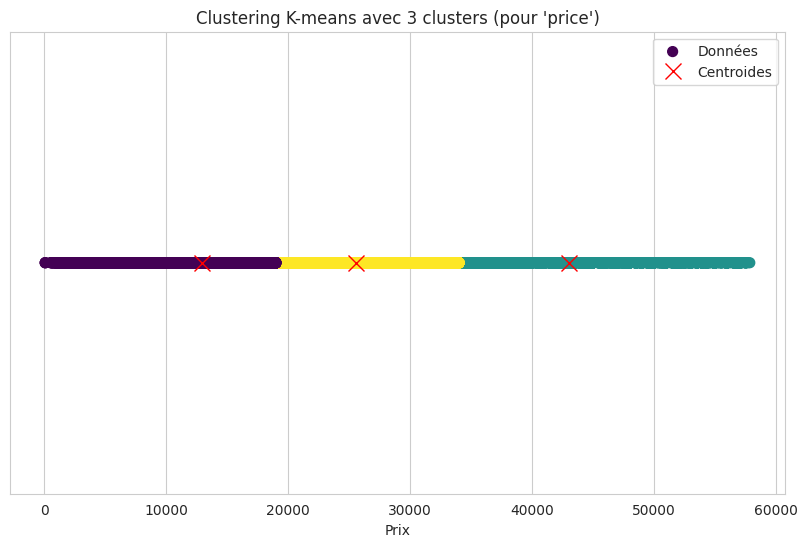

In [123]:
X = df_clean[['price']].values
kmeans = KMeans(n_clusters=3, random_state=0)
y_kmeans = kmeans.fit_predict(X)
df_clean['cluster'] = y_kmeans
centers = kmeans.cluster_centers_
sorted_centers = np.sort(centers, axis=0)
intervals = sorted_centers[1:] - sorted_centers[:-1]
# Visualiser les clusters
plt.figure(figsize=(10, 6))
plt.scatter(df_clean['price'], np.zeros_like(df_clean['price']), c=y_kmeans, s=50, cmap='viridis', label='Données')

# Visualiser les centroides
plt.plot(centers, np.zeros_like(centers), 'rx', markersize=12, label='Centroides')

plt.title("Clustering K-means avec 3 clusters (pour 'price')")
plt.xlabel("Prix")
plt.yticks([])  # Supprimer les ticks de l'axe Y
plt.legend()
plt.show()

## We got our 3 classes 

In [124]:
intervals = [item for sublist in intervals for item in sublist]
intervals = sorted(intervals)

## let's see the distrbutions of cars in the result 

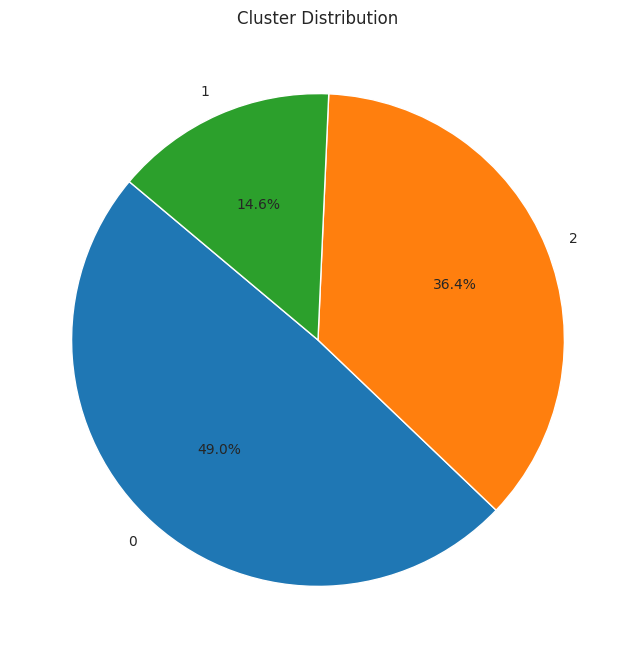

In [125]:
cluster_counts = df_clean["cluster"].value_counts()
plt.figure(figsize=(10, 8))
plt.pie(cluster_counts, labels=cluster_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Cluster Distribution')
plt.show()

## it's clear that we have : low cost, medium, high price.

## We use 5 clusters for the sake of experience

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/tmp/ipykernel_33/2496396268.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['cluster2'] = y_kmeans


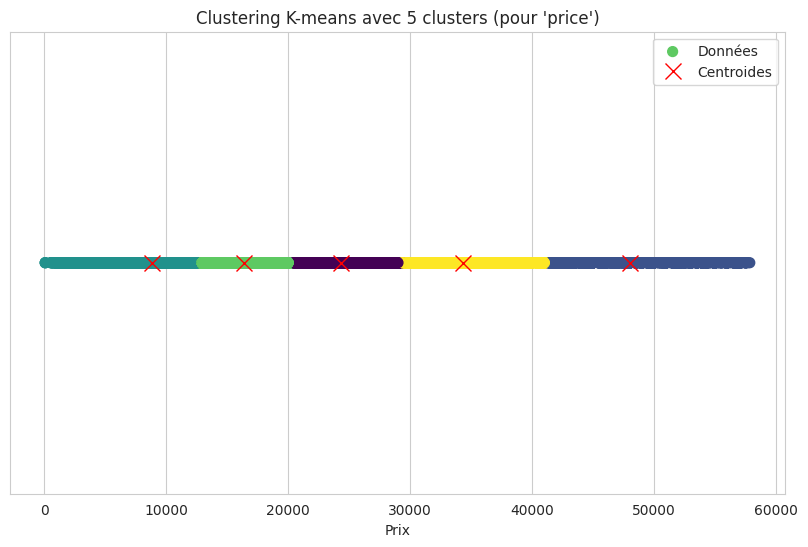

In [126]:
X = df_clean[['price']].values
kmeans = KMeans(n_clusters=5, random_state=0)
y_kmeans = kmeans.fit_predict(X)
df_clean['cluster2'] = y_kmeans
centers = kmeans.cluster_centers_
sorted_centers = np.sort(centers, axis=0)
intervals2 = sorted_centers[1:] - sorted_centers[:-1]
# Visualiser les clusters
plt.figure(figsize=(10, 6))
plt.scatter(df_clean['price'], np.zeros_like(df_clean['price']), c=y_kmeans, s=50, cmap='viridis', label='Données')

# Visualiser les centroides
plt.plot(centers, np.zeros_like(centers), 'rx', markersize=12, label='Centroides')

plt.title("Clustering K-means avec 5 clusters (pour 'price')")
plt.xlabel("Prix")
plt.yticks([])  # Supprimer les ticks de l'axe Y
plt.legend()
plt.show()

In [127]:
intervals2 = [item for sublist in intervals2 for item in sublist]
intervals2 = sorted(intervals2)

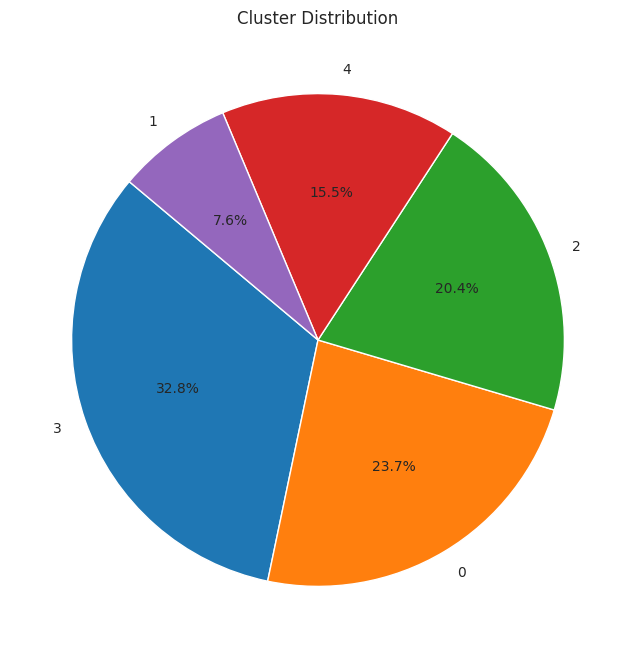

In [128]:
cluster_counts = df_clean["cluster2"].value_counts()
plt.figure(figsize=(10, 8))
plt.pie(cluster_counts, labels=cluster_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Cluster Distribution')
plt.show()

In [129]:
df_clean1 = df_clean.copy()
df_clean2 = df_clean.copy()

In [130]:
df_clean1["price"] = df_clean1["cluster"]
df_clean2["price"] = df_clean2["cluster2"]

In [131]:
df_clean1 = df_clean1.drop(columns =["cluster", "cluster2"])
df_clean2 = df_clean2.drop(columns =["cluster", "cluster2"])

# Classification algorithms 

## Labeling and Scaling 

In [132]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
label_encoder = LabelEncoder()
categorical_features = df_clean1.select_dtypes(exclude=['number']).columns.tolist()
X1 = df_clean1.copy()
for col in categorical_features:
    X1[col] = label_encoder.fit_transform(X1[col])
y1 = X1["price"]
X1 = X1.drop(columns=["price"], axis=1)

X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=42)

scaler = StandardScaler()
X1_train_scaled = scaler.fit_transform(X1_train)
X1_test_scaled = scaler.transform(X1_test)


In [133]:
label_encoder = LabelEncoder()
categorical_features = df_clean2.select_dtypes(exclude=['number']).columns.tolist()
X2 = df_clean2.copy()
for col in categorical_features:
    X2[col] = label_encoder.fit_transform(X2[col])
y2 = X2["price"]
X2 = X2.drop(columns=["price"], axis=1)

X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=42)

scaler = StandardScaler()
X2_train_scaled = scaler.fit_transform(X2_train)
X2_test_scaled = scaler.transform(X2_test)


## Decision trees

### With 3 classes

In [134]:
from sklearn.metrics import classification_report, accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

clf = DecisionTreeClassifier(random_state=42)

clf.fit(X1_train_scaled, y1_train)

y1_pred = clf.predict(X1_test_scaled)

print("Accuracy:", accuracy_score(y1_test, y1_pred))
print("Classification Report:\n", classification_report(y1_test, y1_pred))

Accuracy: 0.82282205449661
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.86      0.86      3875
           1       0.75      0.78      0.76      1088
           2       0.81      0.79      0.80      2854

    accuracy                           0.82      7817
   macro avg       0.80      0.81      0.81      7817
weighted avg       0.82      0.82      0.82      7817



### We got 82.28% accuracy which is considered good 

In [135]:
clf = DecisionTreeClassifier(random_state=42)

clf.fit(X2_train_scaled, y2_train)

y2_pred = clf.predict(X2_test_scaled)

print("Accuracy:", accuracy_score(y2_test, y2_pred))
print("Classification Report:\n", classification_report(y2_test, y2_pred))

Accuracy: 0.7702443392605859
Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.74      0.75      1871
           1       0.74      0.78      0.76       571
           2       0.82      0.83      0.82      1615
           3       0.77      0.77      0.77      2592
           4       0.71      0.72      0.72      1168

    accuracy                           0.77      7817
   macro avg       0.76      0.77      0.77      7817
weighted avg       0.77      0.77      0.77      7817



## We got 77% accuracy for 5 classes

## Random Forests

##  For 3 classes 

In [136]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X1_train_scaled, y1_train)

y1_pred = clf.predict(X1_test_scaled)

print("Accuracy:", accuracy_score(y1_test, y1_pred))
print("Classification Report:\n", classification_report(y1_test, y1_pred))

# Feature importance
feature_importances = clf.feature_importances_
indices = np.argsort(feature_importances)[::-1]

Accuracy: 0.8484073173851862
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.89      0.88      3875
           1       0.85      0.78      0.81      1088
           2       0.84      0.81      0.82      2854

    accuracy                           0.85      7817
   macro avg       0.85      0.83      0.84      7817
weighted avg       0.85      0.85      0.85      7817



## We got 85% accuracy

## For 5 classes

In [137]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X2_train_scaled, y2_train)

y2_pred = clf.predict(X2_test_scaled)

print("Accuracy:", accuracy_score(y2_test, y2_pred))
print("Classification Report:\n", classification_report(y2_test, y2_pred))

# Feature importance
feature_importances = clf.feature_importances_
indices = np.argsort(feature_importances)[::-1]

Accuracy: 0.7951899705769476
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.76      0.77      1871
           1       0.81      0.78      0.80       571
           2       0.87      0.85      0.86      1615
           3       0.76      0.82      0.79      2592
           4       0.78      0.73      0.75      1168

    accuracy                           0.80      7817
   macro avg       0.80      0.79      0.79      7817
weighted avg       0.80      0.80      0.80      7817



## Got 80% accuracy

## We notice that random forests are better then trees (which is somthing obvious)

# KNN

## We use the elbow technique to get the best value for K

### With 3 price classes

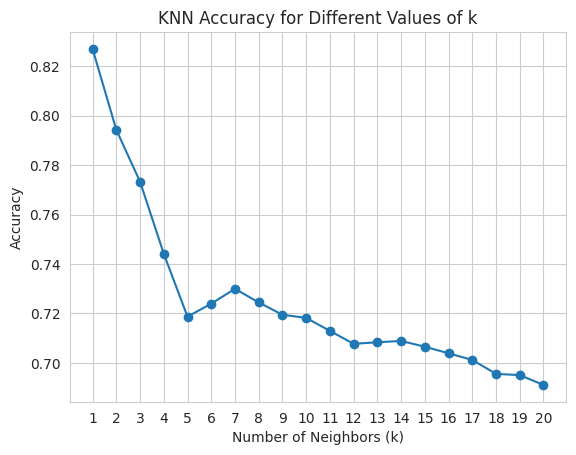

In [138]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

k_values = range(1, 21)  # Example: Evaluate k from 1 to 20

# Initialize lists to store accuracy scores
accuracies = []

# Iterate over each value of k
for k in k_values:
    # Initialize KNN classifier with current k
    knn = KNeighborsClassifier(n_neighbors=k)
    
    # Train the classifier
    knn.fit(X1_train_scaled, y1_train)
    
    # Make predictions on the test set
    y1_pred = knn.predict(X1_test_scaled)
    
    # Calculate accuracy and store it
    accuracy = accuracy_score(y1_test, y1_pred)
    accuracies.append(accuracy)

# Plot the results
plt.plot(k_values, accuracies, marker='o')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.title('KNN Accuracy for Different Values of k')
plt.xticks(k_values)
plt.grid(True)
plt.show()


### The accuracy drops drastically when k rises
### We Choose the value 3 and 5

In [139]:
k = 3
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X1_train, y1_train)
y1_pred = knn.predict(X1_test)
accuracy = accuracy_score(y1_test, y1_pred)
print("Accuracy:", accuracy)
print("Classification Report:\n", classification_report(y2_test, y2_pred))

Accuracy: 0.7092234872713317
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.76      0.77      1871
           1       0.81      0.78      0.80       571
           2       0.87      0.85      0.86      1615
           3       0.76      0.82      0.79      2592
           4       0.78      0.73      0.75      1168

    accuracy                           0.80      7817
   macro avg       0.80      0.79      0.79      7817
weighted avg       0.80      0.80      0.80      7817



In [140]:
k = 5
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X1_train, y1_train)
y1_pred = knn.predict(X1_test)
accuracy = accuracy_score(y1_test, y1_pred)
print("Accuracy:", accuracy)
print("Classification Report:\n", classification_report(y2_test, y2_pred))

Accuracy: 0.6372009722399897
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.76      0.77      1871
           1       0.81      0.78      0.80       571
           2       0.87      0.85      0.86      1615
           3       0.76      0.82      0.79      2592
           4       0.78      0.73      0.75      1168

    accuracy                           0.80      7817
   macro avg       0.80      0.79      0.79      7817
weighted avg       0.80      0.80      0.80      7817



## With 5 price 

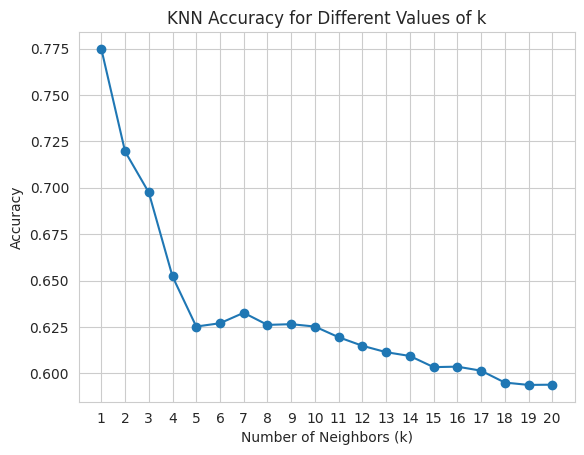

In [141]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

k_values = range(1, 21)  # Example: Evaluate k from 1 to 20

# Initialize lists to store accuracy scores
accuracies = []

# Iterate over each value of k
for k in k_values:
    # Initialize KNN classifier with current k
    knn = KNeighborsClassifier(n_neighbors=k)
    
    # Train the classifier
    knn.fit(X1_train_scaled, y2_train)
    
    # Make predictions on the test set
    y2_pred = knn.predict(X1_test_scaled)
    
    # Calculate accuracy and store it
    accuracy = accuracy_score(y2_test, y2_pred)
    accuracies.append(accuracy)

# Plot the results
plt.plot(k_values, accuracies, marker='o')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.title('KNN Accuracy for Different Values of k')
plt.xticks(k_values)
plt.grid(True)
plt.show()


In [142]:
k = 3
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X2_train, y2_train)
y2_pred = knn.predict(X2_test)
accuracy = accuracy_score(y2_test, y2_pred)
print("Accuracy:", accuracy)
print("Classification Report:\n", classification_report(y2_test, y2_pred))

Accuracy: 0.6099526672636562
Classification Report:
               precision    recall  f1-score   support

           0       0.53      0.66      0.59      1871
           1       0.54      0.54      0.54       571
           2       0.68      0.65      0.67      1615
           3       0.65      0.60      0.63      2592
           4       0.62      0.53      0.57      1168

    accuracy                           0.61      7817
   macro avg       0.61      0.60      0.60      7817
weighted avg       0.62      0.61      0.61      7817



In [143]:
k = 5
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X2_train, y2_train)
y1_pred = knn.predict(X2_test)
accuracy = accuracy_score(y2_test, y2_pred)
print("Accuracy:", accuracy)
print("Classification Report:\n", classification_report(y2_test, y2_pred))

Accuracy: 0.6099526672636562
Classification Report:
               precision    recall  f1-score   support

           0       0.53      0.66      0.59      1871
           1       0.54      0.54      0.54       571
           2       0.68      0.65      0.67      1615
           3       0.65      0.60      0.63      2592
           4       0.62      0.53      0.57      1168

    accuracy                           0.61      7817
   macro avg       0.61      0.60      0.60      7817
weighted avg       0.62      0.61      0.61      7817



## According to the classification reports we conclude that the random forest classifier is the best model to use in our case 